<a href="https://colab.research.google.com/github/Ajeyanth/HousePrices/blob/main/HousesPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from google.colab import files


In [47]:
# Step 1: Upload the file
uploaded = files.upload()


Saving 2018-2022.csv to 2018-2022 (1).csv


In [ ]:
# Import the data
df = pd.read_csv("2018-2022.csv")
df['deed_date']=pd.to_datetime(df['deed_date'])
df=pd.DataFrame(df)
df= df.drop_duplicates(subset=['price_paid','deed_date','street','paon','saon','estate_type', 'district'])
print(df.columns.values)
df=df.loc[:,['price_paid','deed_date','street', 'postcode','property_type','estate_type', 'district']]
print(df)

df['deed_date'] = df['deed_date'].apply(lambda x: x.timestamp())
df_2= df.sort_values(by='price_paid', ascending=True)
print(df_2)

['unique_id' 'price_paid' 'deed_date' 'postcode' 'property_type'
 'new_build' 'estate_type' 'saon' 'paon' 'street' 'locality' 'town'
 'district' 'county' 'transaction_category'
 'linked_data_uri"8355F008-E750-55C5-E053-6B04A8C0D090"' '233500'
 '2018-11-26' 'E1 0AD' 'F' 'N' 'L' 'FLAT 4' 'BILL FAUST HOUSE, 20'
 'TARLING STREET' 'Unnamed: 25' 'LONDON' 'TOWER HAMLETS' 'GREATER LONDON'
 'A'
 'http://landregistry.data.gov.uk/data/ppi/transaction/8355F008-E750-55C5-E053-6B04A8C0D090/current']
        price_paid  deed_date               street postcode property_type  \
0           140000 2019-05-24       TARLING STREET   E1 0AD             F   
1           325000 2020-08-13       TARLING STREET   E1 0AD             F   
2           176000 2018-12-06       TARLING STREET   E1 0AD             F   
3           430500 2018-10-18         CABLE STREET   E1 0AE             F   
4           420000 2021-06-25         CABLE STREET   E1 0AE             F   
...            ...        ...                  

In [ ]:
df_cleaned=df_2.dropna()
print(df_cleaned)
print(df_cleaned.isna().any())


        price_paid     deed_date               street  postcode property_type  \
79792       100000  1.538352e+09        COSTER AVENUE    N4 2LD             F   
202943      100000  1.635466e+09        KNIGHTSBRIDGE  SW1X 7LJ             O   
245637      100000  1.613088e+09       EARLHAM STREET  WC2H 9LD             O   
155288      100000  1.536192e+09       CRANFIELD WALK   SE3 9EX             F   
245407      100000  1.607558e+09      PORTUGAL STREET  WC2A 2AT             O   
...            ...           ...                  ...       ...           ...   
174274     2000000  1.547597e+09  CHARLES CLOWES WALK  SW11 7AJ             F   
61167      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
61168      2000000  1.581466e+09   WOODSIDE PARK ROAD   N12 8RP             O   
211637     2000000  1.534723e+09        TREBOVIR ROAD   SW5 9TF             F   
211245     2000000  1.638490e+09   COURTFIELD GARDENS   SW5 0PD             F   

       estate_type         

In [ ]:
print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245244, dtype: object


In [ ]:
for x in df_cleaned['district'].unique():
    if df_cleaned['district'].value_counts()[x] < 100:
        df_cleaned = df_cleaned[df_cleaned['district'] != x]

print(df_cleaned['district'])

79792                    HACKNEY
202943       CITY OF WESTMINSTER
245637                    CAMDEN
155288                 GREENWICH
245407       CITY OF WESTMINSTER
                   ...          
174274                WANDSWORTH
61167                     BARNET
61168                     BARNET
211637    KENSINGTON AND CHELSEA
211245    KENSINGTON AND CHELSEA
Name: district, Length: 245157, dtype: object


Slope: 0.000347911909175046
Intercept: 922899.0711602273
R-squared: 0.0007295430020186263
P-value: 0.04542908531778601
Standard error: 0.00017385895106944866


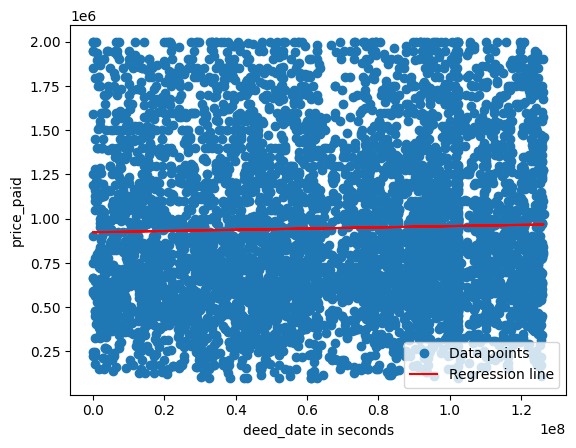

In [49]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Convert 'deed_date' to datetime objects
df_cleaned['deed_date'] = pd.to_datetime(df_cleaned['deed_date'], unit='s')

# Calculate time elapsed in seconds since the earliest date for Kensington
df_kensington = df_cleaned[df_cleaned['district'] == 'KENSINGTON AND CHELSEA']

x = (df_kensington['deed_date'] - df_kensington['deed_date'].min()).dt.total_seconds()

y = df_kensington['price_paid'].to_numpy()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Plot the data and the regression line
plt.plot(x, y,'o', label='Data points')
plt.plot(x, intercept + slope*x, color='red', label='Regression line')
plt.xlabel('deed_date in seconds')
plt.ylabel('price_paid')
plt.legend()
plt.show()

